# Technical Setup

## Python

In [1]:
#data processing
import numpy as np
import pandas as pd
import os
import datetime
import math
import functools
from datetime import datetime
import scipy.stats as stats
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, AgglomerativeClustering, SpectralClustering, MeanShift
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift
from sklearn.manifold import TSNE
import umap

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import sys
sys.path.append(r"D:\Project\rpy2_testing\src")
import my_utils

import warnings
warnings.filterwarnings('ignore')

c:\Users\ramdh\anaconda3\envs\rpy2_env\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\ramdh\anaconda3\envs\rpy2_env\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\ramdh\anaconda3\envs\rpy2_env\Lib\site-packages\umap\distances.py:1086: Num

## R

In [2]:
os.environ['R_HOME'] = 'C:/Program Files/R/R-4.3.1'  

# import rpy2's package module
from rpy2.robjects.packages import importr
from functools import partial
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector
from rpy2.ipython import html
html.html_rdataframe=partial(html.html_rdataframe, table_class="docutils")

%load_ext rpy2.ipython

In [3]:
#RUn to install R packages if not installed yet
utils = importr('utils')
base = importr('base')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list

# R package names
packnames = ('showtext', 'patchwork', 'janitor', 'glue', 'ggpath')


# Selectively install what needs to be install.
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

In [5]:
%%R 

install.packages("ggchicklet", repos = "https://cinc.rud.is")


Installing package into 'C:/Users/ramdh/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)
  cannot open URL 'https://cinc.rud.is/bin/windows/contrib/4.3/PACKAGES'
installing the source package 'ggchicklet'

trying URL 'https://cinc.rud.is/src/contrib/ggchicklet_0.5.0.tar.gz'
Content type 'application/octet-stream' length 408478 bytes (398 KB)
downloaded 398 KB


The downloaded source packages are in
	'C:\Users\ramdh\AppData\Local\Temp\RtmpGkjype\downloaded_packages'


In [3]:
%%R
library(ggplot2)
library(ggstatsplot)
library(showtext)
library(patchwork)
library(ggthemr)
library(janitor)
library(broom)
library(tidyverse)
library(glue)
library(ggpath)
library(ggchicklet)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.1     v tidyr     1.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167
Loading required package: sysfonts
Loading required package: showtextdb

Attaching package: 'janitor'

The following objects are masked from 'package:stats':

    chisq.test, fisher.test



# Data Collection, Understanding, and Preparation

## Data Collection

In [4]:
df_raw = pd.read_csv('data\marketing_campaign.csv', sep='\t')

## Data Understanding

In [14]:
df_raw.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [5]:
df_raw.to_json(orient='records')

'[{"ID":5524,"Year_Birth":1957,"Education":"Graduation","Marital_Status":"Single","Income":58138.0,"Kidhome":0,"Teenhome":0,"Dt_Customer":"04-09-2012","Recency":58,"MntWines":635,"MntFruits":88,"MntMeatProducts":546,"MntFishProducts":172,"MntSweetProducts":88,"MntGoldProds":88,"NumDealsPurchases":3,"NumWebPurchases":8,"NumCatalogPurchases":10,"NumStorePurchases":4,"NumWebVisitsMonth":7,"AcceptedCmp3":0,"AcceptedCmp4":0,"AcceptedCmp5":0,"AcceptedCmp1":0,"AcceptedCmp2":0,"Complain":0,"Z_CostContact":3,"Z_Revenue":11,"Response":1},{"ID":2174,"Year_Birth":1954,"Education":"Graduation","Marital_Status":"Single","Income":46344.0,"Kidhome":1,"Teenhome":1,"Dt_Customer":"08-03-2014","Recency":38,"MntWines":11,"MntFruits":1,"MntMeatProducts":6,"MntFishProducts":2,"MntSweetProducts":1,"MntGoldProds":6,"NumDealsPurchases":2,"NumWebPurchases":1,"NumCatalogPurchases":1,"NumStorePurchases":2,"NumWebVisitsMonth":5,"AcceptedCmp3":0,"AcceptedCmp4":0,"AcceptedCmp5":0,"AcceptedCmp1":0,"AcceptedCmp2":0,"Co

In [6]:
my_utils.dataframe_info(df_raw)

Column Data Type Unique Count  \
0                    ID     int64         2240   
1            Year_Birth     int64           59   
2             Education    object            5   
3        Marital_Status    object            8   
4                Income   float64         1974   
5               Kidhome     int64            3   
6              Teenhome     int64            3   
7           Dt_Customer    object          663   
8               Recency     int64          100   
9              MntWines     int64          776   
10            MntFruits     int64          158   
11      MntMeatProducts     int64          558   
12      MntFishProducts     int64          182   
13     MntSweetProducts     int64          177   
14         MntGoldProds     int64          213   
15    NumDealsPurchases     int64           15   
16      NumWebPurchases     int64           15   
17  NumCatalogPurchases     int64           14   
18    NumStorePurchases     int64           14   
19    NumWebVisitsMonth     int64           16   
20         AcceptedCmp3     int64            2   
21         AcceptedCmp4     int64            2   
22         AcceptedCmp5     int64            2   
23         AcceptedCmp1     int64            2   
24         AcceptedCmp2     int64            2   
25             Complain     int64            2   
26        Z_CostContact     int64            1   
27            Z_Revenue     int64            1   
28             Response     int64            2   

                                        Unique Sample Missing Values  \
0                      [5524, 2174, 4141, 6182, 5324]              0   
1                      [1957, 1954, 1965, 1984, 1981]              0   
2          [Graduation, PhD, Master, Basic, 2n Cycle]              0   
3        [Single, Together, Married, Divorced, Widow]              0   
4       [58138.0, 46344.0, 71613.0, 26646.0, 58293.0]             24   
5                                           [0, 1, 2]              0   
6                                           [0, 1, 2]              0   
7   [04-09-2012, 08-03-2014, 21-08-2013, 10-02-201...              0   
8                                [58, 38, 26, 94, 16]              0   
9                            [635, 11, 426, 173, 520]              0   
10                                 [88, 1, 49, 4, 43]              0   
11                             [546, 6, 127, 20, 118]              0   
12                              [172, 2, 111, 10, 46]              0   
13                                 [88, 1, 21, 3, 27]              0   
14                                 [88, 6, 42, 5, 15]              0   
15                                    [3, 2, 1, 5, 4]              0   
16                                    [8, 1, 2, 5, 6]              0   
17                                   [10, 1, 2, 0, 3]              0   
18                                   [4, 2, 10, 6, 7]              0   
19                                    [7, 5, 4, 6, 8]              0   
20                                             [0, 1]              0   
21                                             [0, 1]              0   
22                                             [0, 1]              0   
23                                             [0, 1]              0   
24                                             [0, 1]              0   
25                                             [0, 1]              0   
26                                                [3]              0   
27                                               [11]              0   
28                                             [1, 0]              0   

    Missing Percentage  
0               0.0000  
1               0.0000  
2               0.0000  
3               0.0000  
4               1.0714  
5               0.0000  
6               0.0000  
7               0.0000  
8               0.0000  
9               0.0000  
10              0.0000  
11              0.0000  
12              0.0000  
13   

This dataset contains 29 variables, consisting of integers (int64), floating points (float64), and objects (object). 

- **ID**: A unique identifier for each customer. This feature may not contribute to a predictive model.

- **Year_Birth**: The birth year of customers, which can be converted to 'Age'.

- **Education** and **Marital_Status**: Categorical features that may require one-hot encoding.

- **Income**: A continuous feature indicating customer's income, with some missing values that need to be filled.

- **Kidhome** and **Teenhome**: Integer variables indicating the number of children in the household.

- **Dt_Customer**: The joining date of customers, which may need to be converted to 'tenure' or similar measure.

- **Recency**: Indicates how recently a customer made a purchase. Further context is needed for proper interpretation.

- **MntX** and **NumXPurchases**: Represent the amount spent on different categories of products and the number of purchases made through different channels, respectively.

- **AcceptedCmpX**: Binary features indicating whether the customer accepted offers in different campaigns.

- **Complain**: A binary feature indicating if the customer made a complaint recently.

- **Z_CostContact** and **Z_Revenue**: Features with no variance, hence can be removed.

- **Response**: The binary target variable indicating whether a customer accepted the latest offer.

Preprocessing will depend on the final model chosen and can involve scaling, encoding, or dropping some features.


## Data Preparation

The dataset underwent significant preprocessing to ensure it was in an optimal state for analysis. The following steps were taken to enhance its quality:

1. **Feature Removal**: Non-contributory features such as `ID`, `Z_CostContact`, and `Z_Revenue` were discarded.
2. **Handling Missing Data**: Missing values in the `Income` feature were addressed appropriately.
3. **Feature Engineering**: Several new features were crafted based on the existing data. This includes `Age`, `Customer_Tenure`, `Generation`, `Total_Purchases`, and `Total_Spending`.
4. **Encoding Categorical Variables**: Categorical variables underwent encoding to be apt for model processing.
5. **Managing Outliers**: Extreme values and outliers were handled to prevent them from unduly influencing the results.
6. **Merging and Removing Categories**: In the `Marital_Status` feature, categories "Alone" and "YOLO" were merged into "Single". Additionally, the "Absurd" category was removed due to its limited occurrence and distinctiveness based on average income and age.



**footnotes**:
> The 'Generation' feature is classified as per the definitions given by the Pew Research Centre:
>
> - The Silent Generation: Born 1928-1945 (76-93 years old)
> - Baby Boomers: Born 1946-1964 (57-75 years old)
> - Generation X: Born 1965-1980 (41-56 years old)
> - Millennials: Born 1981-1996 (25-40 years old)
> - Generation Z: Born 1997-2012 (9-24 years old)
> - Generation Alpha: Born 2010-2025 (0-11 years old)

### Unnecesary Features Removal, Missing Value Handling, and New Features Generation

The code used for preprocessing and relevant information related to the reasoning behind the preprocessing steps are shown below.

In [5]:
df = df_raw.copy(deep=True)

# 1. Redundant Features Removal
df = df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)

# 2. Missing Values Handling
df['Income'] = df['Income'].fillna(df['Income'].median())

# 3. New Features Derivation
# Calculate Age from Year_Birth
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']
df = df.drop('Year_Birth', axis=1)

# Calculate Total Purchase
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Calculate Customer_Tenure
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
last_recorded_date = df['Dt_Customer'].max()
df['Customer_Tenure'] = (last_recorded_date - df['Dt_Customer']).dt.days

# Calculate Total Spending
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[product_columns].sum(axis=1)

# Create Living_With feature based on Kidhome and Teenhome
conditions = [
    (df['Kidhome'] == 1) & (df['Teenhome'] == 0),
    (df['Kidhome'] == 0) & (df['Teenhome'] == 1),
    (df['Kidhome'] == 1) & (df['Teenhome'] == 1),
]
choices = ['With_Kids', 'With_Teens', 'With_Kids_and_Teens']
df['Living_With'] = np.select(conditions, choices, default='Alone')

# Create Is_Parent feature
df['Is_Parent'] = (df['Kidhome'] + df['Teenhome']).apply(lambda x: 1 if x > 0 else 0)

# Define generations
conditions = [
    (df['Age'] >= 76) & (df['Age'] <= 93),
    (df['Age'] >= 57) & (df['Age'] <= 75),
    (df['Age'] >= 41) & (df['Age'] <= 56),
    (df['Age'] >= 25) & (df['Age'] <= 40),
    (df['Age'] >= 9) & (df['Age'] <= 24),
    (df['Age'] >= 0) & (df['Age'] <= 11),
]
choices = ['Silent_Generation', 'Baby_Boomers', 'Generation_X', 'Millennials', 'Generation_Z', 'Generation_Alpha']
df['Generation'] = np.select(conditions, choices, default='Unknown')

df['AcceptedAnyCmp'] = (df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].sum(axis=1) > 0).astype(int)

temp_df = df[['Marital_Status', 'Income', 'Age']].copy(deep=True)


df = df.drop('Dt_Customer', axis=1)

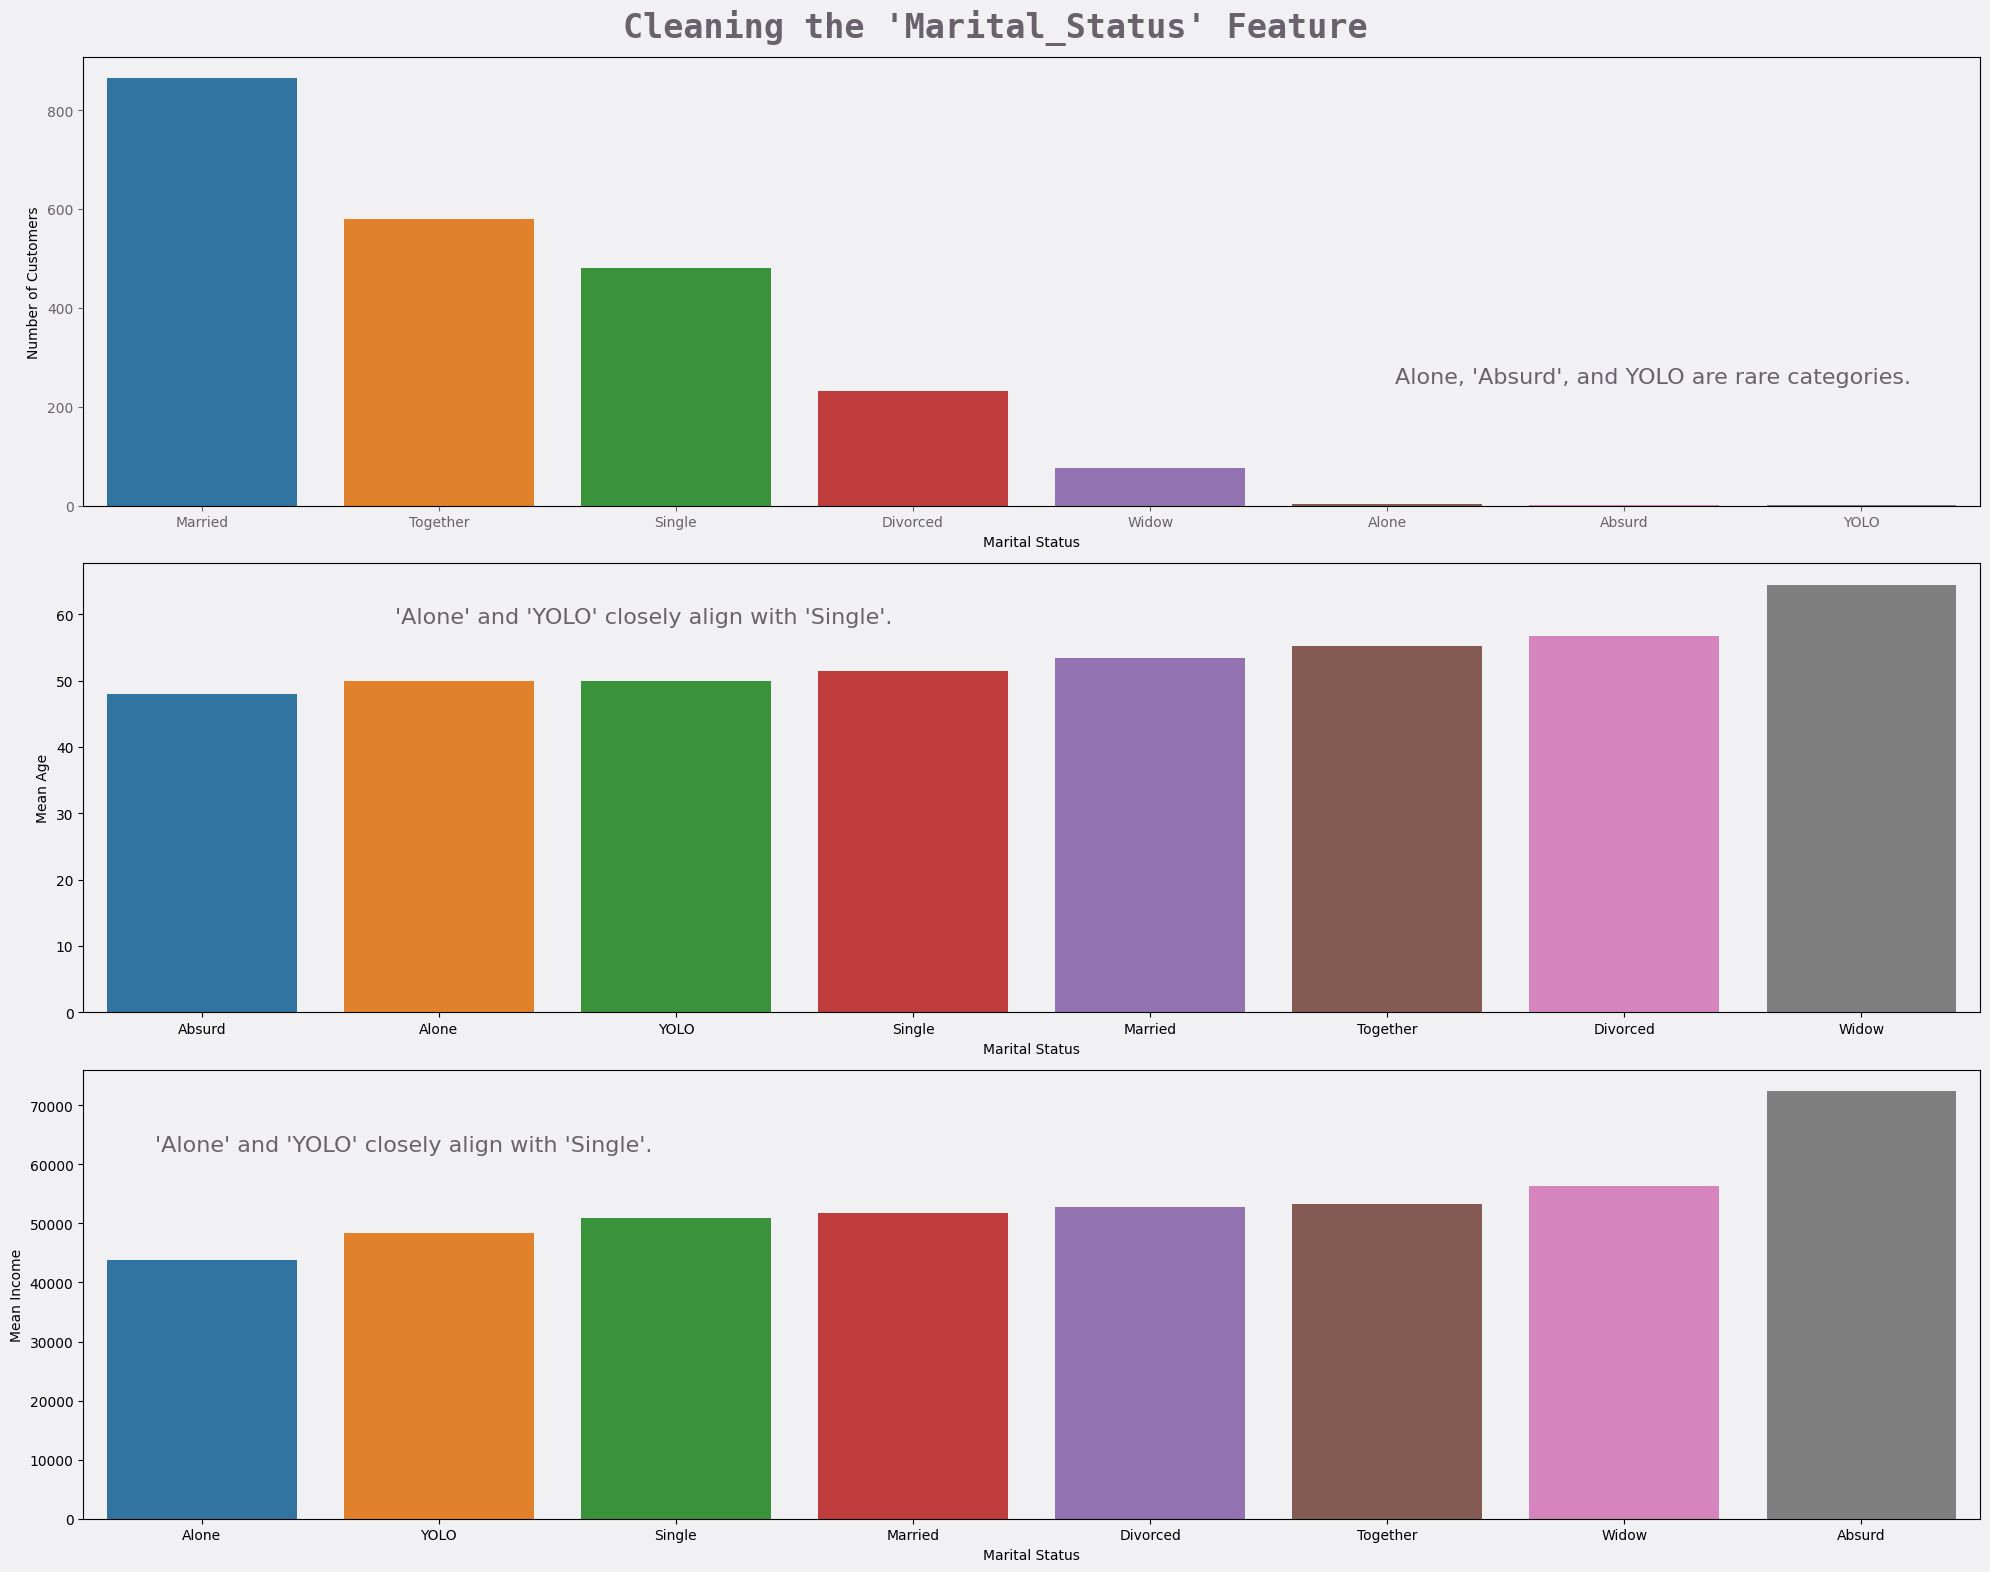

In [8]:
# Calculate the order for the Age plot
order_age = temp_df.groupby('Marital_Status')['Age'].mean().sort_values().index

# Calculate the order for the Income plot
order_income = temp_df.groupby('Marital_Status')['Income'].mean().sort_values().index

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 16), facecolor='#F1F0F2')

sns.countplot(x='Marital_Status', data=temp_df, ax=ax1, order=temp_df['Marital_Status'].value_counts().index)
ax1.set_facecolor('#F1F0F2')
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Number of Customers')
ax1.tick_params(axis='both', colors='#69626D')

# Plot for Age
sns.barplot(x='Marital_Status', y='Age', data=temp_df, estimator=np.mean, ci=None, ax=ax2, order=order_age)
ax2.set_facecolor('#F1F0F2')
ax2.set_ylabel('Mean Age')
ax2.set_xlabel('Marital Status')

# Plot for Income
sns.barplot(x='Marital_Status', y='Income', data=temp_df, estimator=np.mean, ci=None, ax=ax3, order=order_income)
ax3.set_facecolor('#F1F0F2')
ax3.set_ylabel('Mean Income')
ax3.set_xlabel('Marital Status')

# Main title and subtitle
fig.suptitle("Cleaning the 'Marital_Status' Feature", fontsize=24, fontweight='semibold', fontfamily='monospace', color="#69626D")
plt.figtext(0.7, 0.75, "Alone, 'Absurd', and YOLO are rare categories.", ha="left", va="center", fontsize=16, fontfamily='sans-serif', color="#69626D")
plt.figtext(0.2, 0.6, "'Alone' and 'YOLO' closely align with 'Single'.", ha="left", va="center", fontsize=16, fontfamily='sans-serif', color="#69626D")
plt.figtext(0.08, 0.27, "'Alone' and 'YOLO' closely align with 'Single'.", ha="left", va="center", fontsize=16, fontfamily='sans-serif', color="#69626D")

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the space to fit the main title and subtitle
plt.show()


In [6]:
# Merge 'Alone' and 'YOLO' into 'Single'
categories_to_merge = ["Alone", "YOLO"]
df['Marital_Status'] = df['Marital_Status'].replace(categories_to_merge, "Single")


# Remove rows where Marital_Status is 'Absurd'
df = df[df['Marital_Status'] != 'Absurd']

<Axes: >

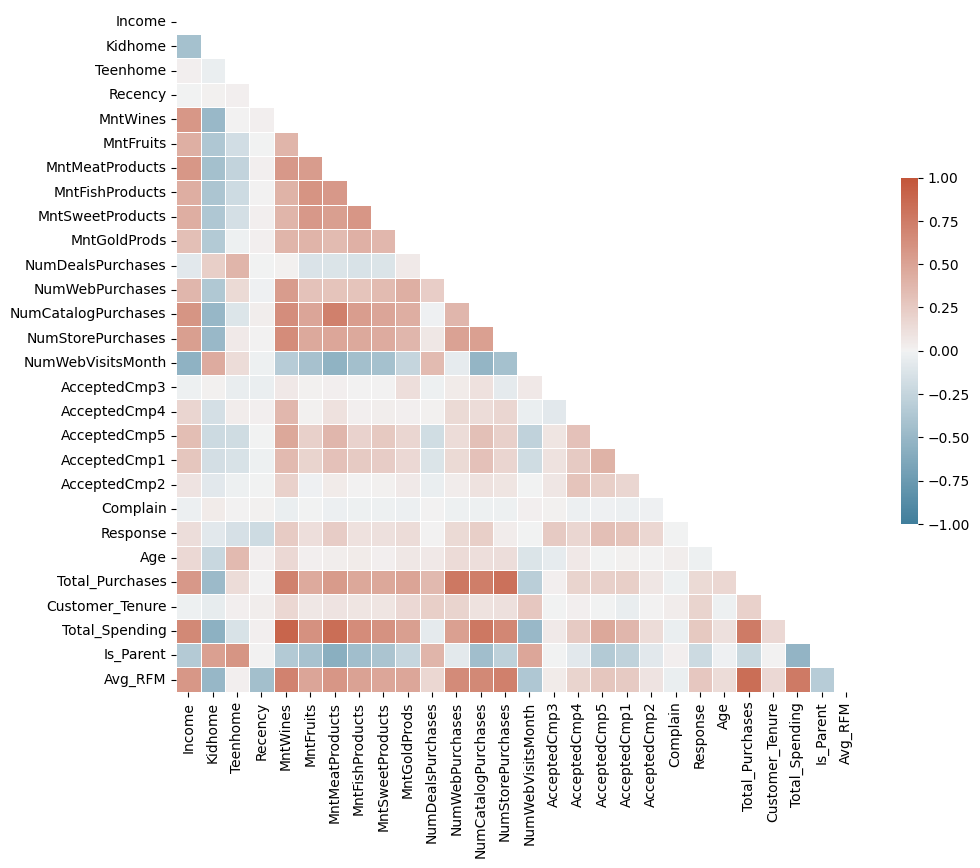

In [8]:
#create correlation heat map of numeric features
df_numeric = df.select_dtypes(include=['int64', 'float64'])
corr = df_numeric.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# RFM Analysis

Below, is how customer persona segments can be made based on RFM scores

| Segment | Definition |
|----------|------------------------|
| **Champions** | Bought recently, buy often and spend the most|
| **New** | Bought most recently, but not often.|
| **Promising** | Recent shoppers, but haven’t spent much.|
| **At Risk** | Purchased often but a long time ago. Need to bring them back!|
| **Can’t Lose Them** | Made biggest purchases, and often. But haven’t returned for a long time.|
| **Lost** | Lowest recency, frequency and monetary scores.|






In [9]:
def rfm_segments(df):
    # Champions
    if df['Recency_Score'] >= 4 and df['Frequency_Score'] >= 4 and df['Monetary_Score'] >= 4:
        return 'Champions'
    # New
    elif df['Recency_Score'] >= 4 and df['Frequency_Score'] <= 2:
        return 'New'
    # Promising
    elif df['Recency_Score'] >= 3 and df['Frequency_Score'] <= 2:
        return 'Promising'
    # At Risk
    elif df['Recency_Score'] <= 2 and df['Frequency_Score'] >= 3 and df['Monetary_Score'] >= 3:
        return 'At Risk'
    # Can’t Lose Them
    elif df['Recency_Score'] <= 2 and df['Frequency_Score'] >= 4 and df['Monetary_Score'] >= 4:
        return 'Can’t Lose Them'
    # Lost
    else:
        return 'Lost'

df['Recency_Score'] = pd.qcut(df['Recency'].rank(method='first'), 5, labels=[5,4,3,2,1]).astype(int)
df['Frequency_Score'] = pd.qcut(df['Total_Purchases'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
df['Monetary_Score'] = pd.qcut(df['Total_Spending'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
df['Avg_RFM'] = (df['Recency_Score'] + df['Frequency_Score'] + df['Monetary_Score'])/3

# Create RFM Segment
df['RFM_Segment'] = df.apply(rfm_segments, axis=1)

#drop Recency, Total_Purchases, and Total_Spending
df = df.drop(['Recency', 'Total_Purchases', 'Total_Spending'], axis=1)


# df[['Recency', 'Recency_Score', 'Total_Purchases', 'Frequency_Score', 'Total_Spending', 'Monetary_Score', 'Avg_RFM', 'RFM_Segment']].head()

# Clustering

## Feature Selection

In [16]:
from sklearn.metrics.pairwise import rbf_kernel
from abc import abstractmethod 

#Implementation of the NormalizedCut feature selection

class SPEC:
    def __init__(self, k):
        self.k = k

    def _calc_scores(self, x):
        similarity = rbf_kernel(x)
        adjacency = similarity
        degree_vector = np.sum(adjacency, 1)
        degree = np.diag(degree_vector)
        laplacian = degree - adjacency
        normaliser_vector = np.reciprocal(np.sqrt(degree_vector))
        normaliser = np.diag(normaliser_vector)

        normalised_laplacian = normaliser.dot(laplacian).dot(normaliser)

        weighted_features = np.matmul(normaliser, x)

        normalised_features = weighted_features / np.linalg.norm(weighted_features, axis=0)
        return self._calc_spec_scores(degree, normalised_laplacian, normalised_features, normaliser)

    @abstractmethod
    def _calc_spec_scores(self, degree, laplacian, normalised_features, normaliser):
        pass

class NormalizedCut(SPEC):
    def _calc_spec_scores(self, degree, laplacian, normalised_features, normaliser):
        all_to_all = normalised_features.transpose().dot(laplacian).dot(normalised_features)
        return np.diag(all_to_all)

    def fit(self, x):
        scores = self._calc_scores(x)
        # Get top k feature indices based on scores
        return np.argsort(scores)[-self.k:]

In [39]:
# Reset the index of the dataframe
df = df.reset_index(drop=True)

categorical_cols = ['Education', 'Marital_Status', 'Generation', 'Living_With', 'Is_Parent', 'RFM_Segment']
binary_cols = ['AcceptedAnyCmp', 'Complain', 'Is_Parent']
redundant_features = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Standardize numerical features excluding binary_cols, categorical_cols, and redundant_features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(binary_cols + categorical_cols + redundant_features, axis=1)), 
                         columns=df.drop(binary_cols + categorical_cols + redundant_features, axis=1).columns)

# Concatenate the standardized, encoded, and binary data
df_processed = pd.concat([df_scaled, df_encoded, df[binary_cols]], axis=1)

df_processed2 = pd.concat([df.drop(categorical_cols + redundant_features, axis=1), df[binary_cols]], axis=1)


In [40]:
df_processed.shape

(2238, 44)

In [41]:
# 3. Apply the algorithm

data = df_processed.to_numpy()
k = 30  # Number of features to select
selector = NormalizedCut(k)
selected_features_indices = selector.fit(data)

# Get the names of the selected columns
selected_columns = df_processed.columns[selected_features_indices]
print(selected_columns)

Index(['Teenhome', 'RFM_Segment_New', 'Frequency_Score', 'Avg_RFM',
       'MntFishProducts', 'AcceptedAnyCmp', 'Living_With_With_Kids_and_Teens',
       'Marital_Status_Single', 'Education_PhD', 'Recency_Score',
       'MntSweetProducts', 'Age', 'MntFruits', 'Education_Master',
       'MntGoldProds', 'MntMeatProducts', 'RFM_Segment_Champions',
       'Generation_Millennials', 'NumDealsPurchases', 'NumWebVisitsMonth',
       'NumCatalogPurchases', 'RFM_Segment_Promising', 'Response',
       'NumWebPurchases', 'Customer_Tenure', 'Education_Basic',
       'Marital_Status_Widow', 'Generation_Silent_Generation', 'Complain',
       'Generation_Unknown'],
      dtype='object')


In [25]:
df_processed2.shape

(2238, 26)

In [42]:
data = df_processed2.to_numpy()
k = 20  # Number of features to select
selector = NormalizedCut(k)
selected_features_indices = selector.fit(data)

# Get the names of the selected columns
selected_numerical_columns = df_processed2.columns[selected_features_indices]
print(selected_columns)

Index(['Teenhome', 'RFM_Segment_New', 'Frequency_Score', 'Avg_RFM',
       'MntFishProducts', 'AcceptedAnyCmp', 'Living_With_With_Kids_and_Teens',
       'Marital_Status_Single', 'Education_PhD', 'Recency_Score',
       'MntSweetProducts', 'Age', 'MntFruits', 'Education_Master',
       'MntGoldProds', 'MntMeatProducts', 'RFM_Segment_Champions',
       'Generation_Millennials', 'NumDealsPurchases', 'NumWebVisitsMonth',
       'NumCatalogPurchases', 'RFM_Segment_Promising', 'Response',
       'NumWebPurchases', 'Customer_Tenure', 'Education_Basic',
       'Marital_Status_Widow', 'Generation_Silent_Generation', 'Complain',
       'Generation_Unknown'],
      dtype='object')


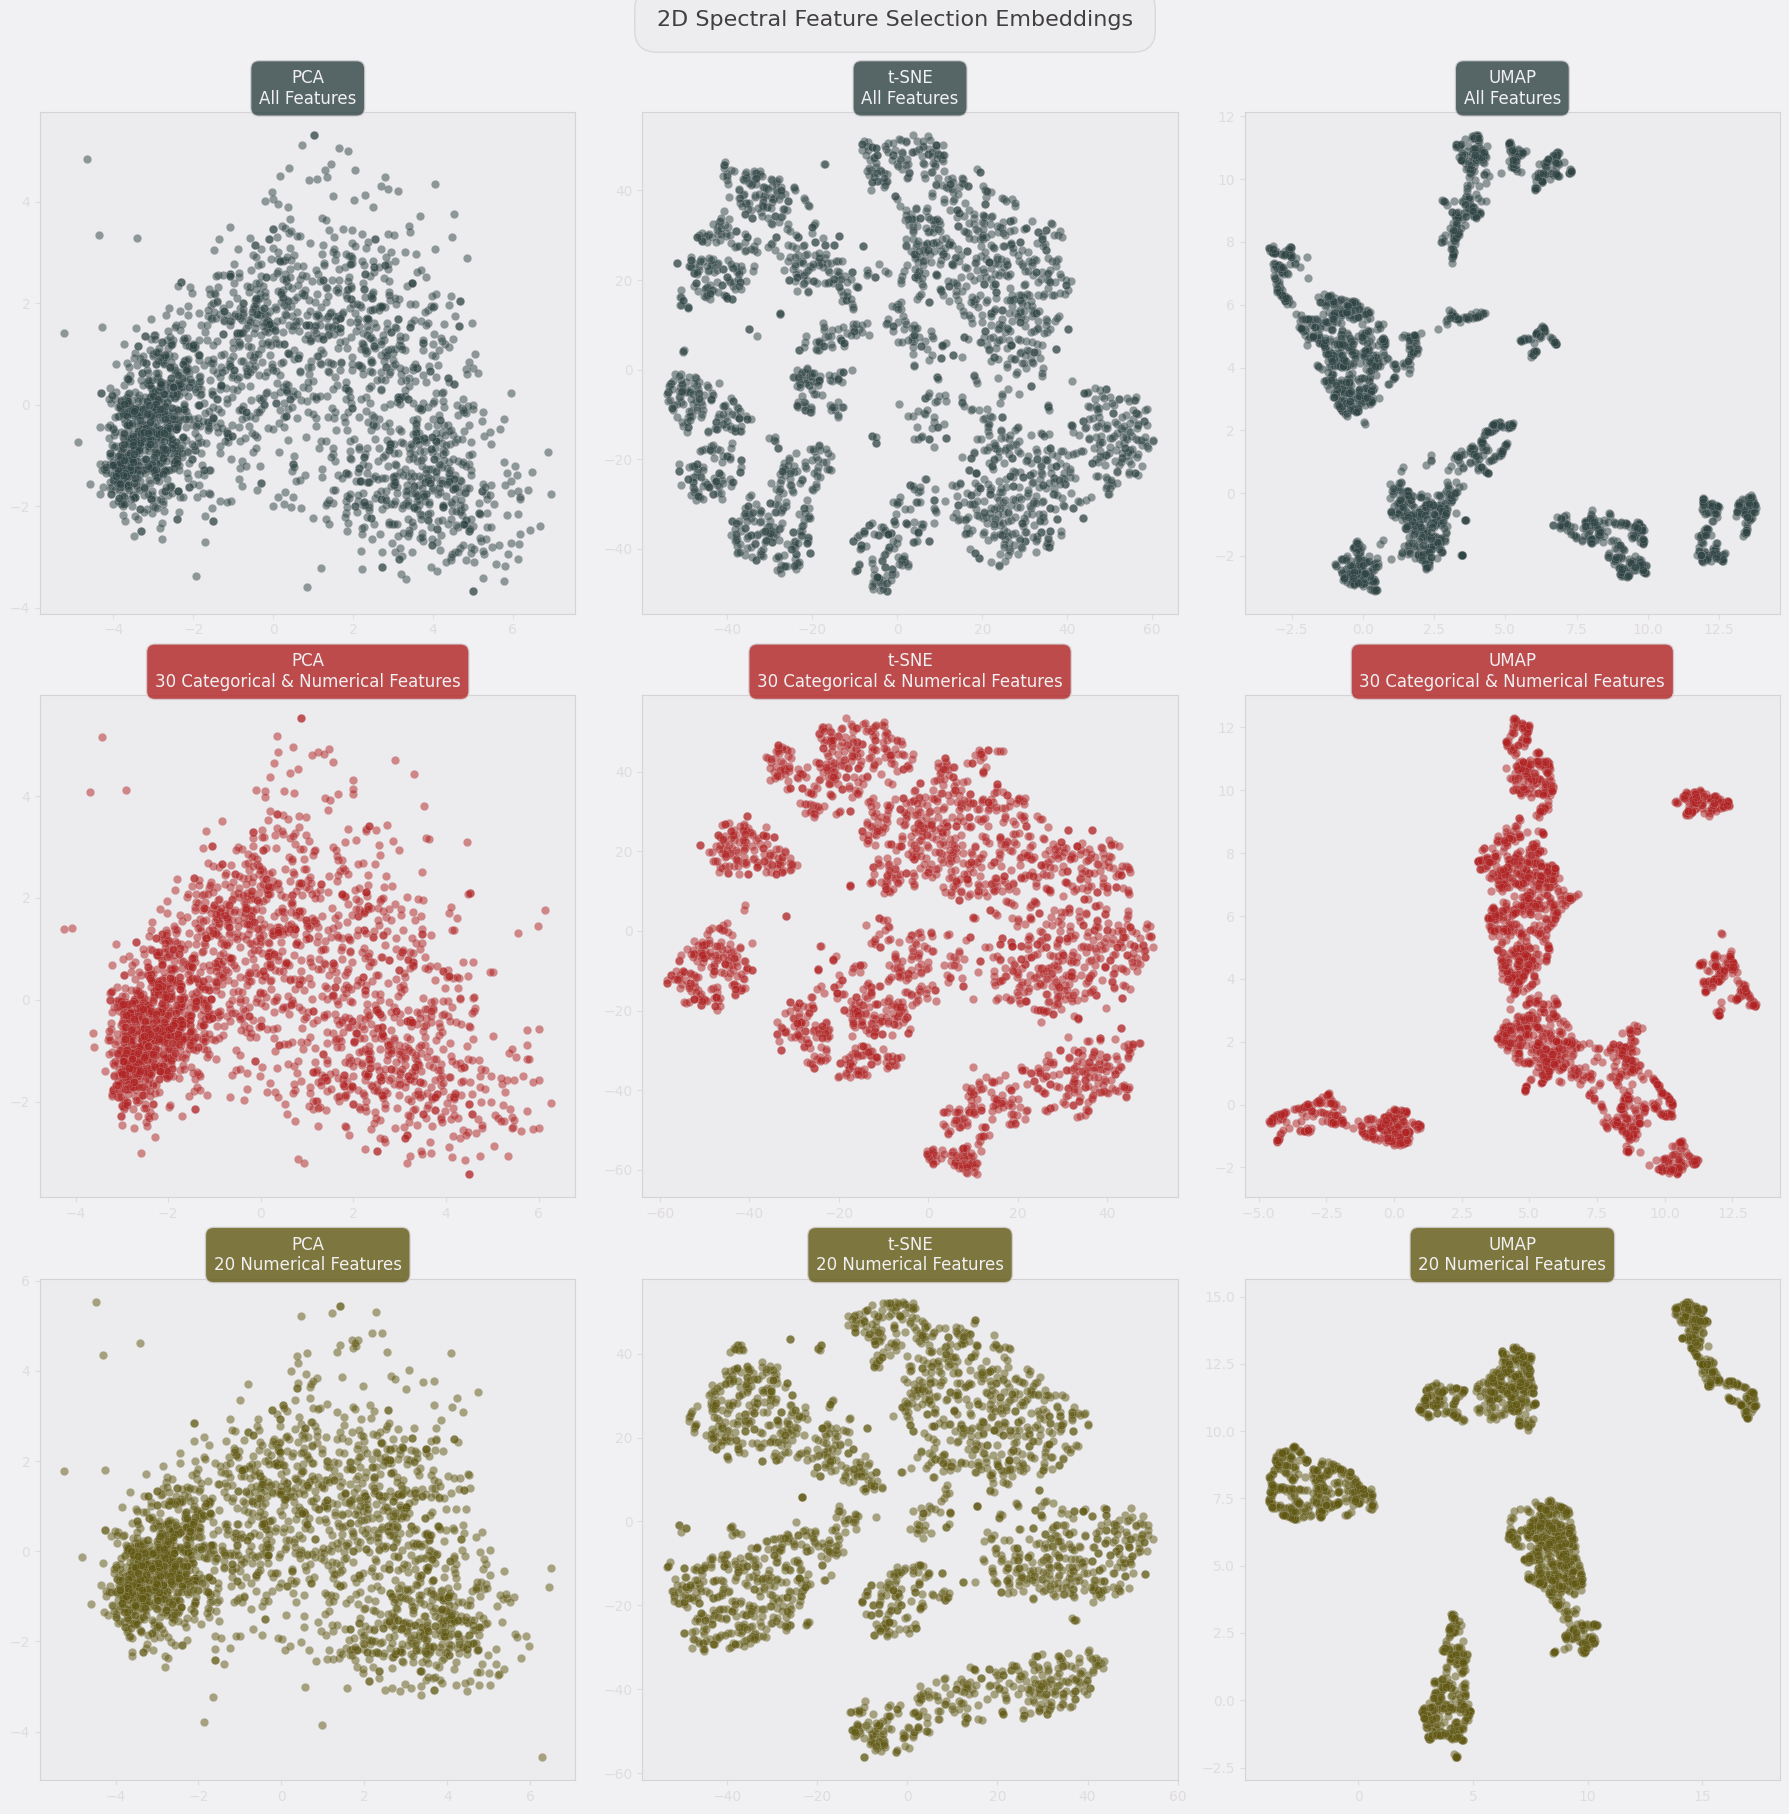

In [129]:
def visualize_embeddings_single_frame(feature_sets, colors, df):
    # Number of feature sets
    n_sets = len(feature_sets)
    
    # Initialize the figure and gridspec
    fig = plt.figure(figsize=(18, 6 * n_sets), facecolor='#F1F0F2')
    gs = gridspec.GridSpec(n_sets, 3, figure=fig)
    
    for i, (name, features) in enumerate(feature_sets.items()):
        color = colors[i]
    
        # Select features
        X = df[features]

        # As data is already preprocessed, no need for additional preprocessing
        X_processed = X

        # PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_processed)

        # t-SNE
        tsne = TSNE(n_components=2, random_state=42)
        X_tsne = tsne.fit_transform(X_processed)

        # UMAP
        reducer = umap.UMAP(n_neighbors=10, n_components=2, random_state=42)
        X_umap = reducer.fit_transform(X_processed)

        subplot_color = '#ecebed'
        # Create and format the subplots
        for j, (data, title) in enumerate([(X_pca, "PCA"), (X_tsne, "t-SNE"), (X_umap, "UMAP")]):
            ax = fig.add_subplot(gs[i, j])
            ax.scatter(data[:, 0], data[:, 1], color=color, alpha=0.5, edgecolor='#DFDCE0', linewidth=0.2)
            ax.set_title(f"{title}\n{name}", color='#F1F0F2', fontweight='normal', family='sans-serif',
                        bbox=dict(facecolor=color, edgecolor='#d5d3d6', boxstyle='round,pad=0.5', alpha=0.8))
            ax.set_facecolor(subplot_color)
            ax.tick_params(axis='both', colors='#DFDCE0')
            ax.grid(False)
            # Change the frame border color for each plot
            for spine in ax.spines.values():
                spine.set_edgecolor('#d5d3d6')

    fig.suptitle('2D Spectral Feature Selection Embeddings', y=+1.005, color='#413f42', 
                fontweight='light', family='sans-serif', size=16,
                bbox=dict(facecolor='#ecebed', edgecolor='#d5d3d6', boxstyle='round,pad=1', alpha=0.8))
    plt.tight_layout()
    plt.show()

# Call the function with your feature sets
colors = ['#2f4444', 'firebrick', '#605811']
feature_sets = {
    'All Features': df_processed.columns,
    '30 Categorical & Numerical Features': selected_columns,
    '20 Numerical Features': selected_numerical_columns,
}
visualize_embeddings_single_frame(feature_sets, colors, df_processed)


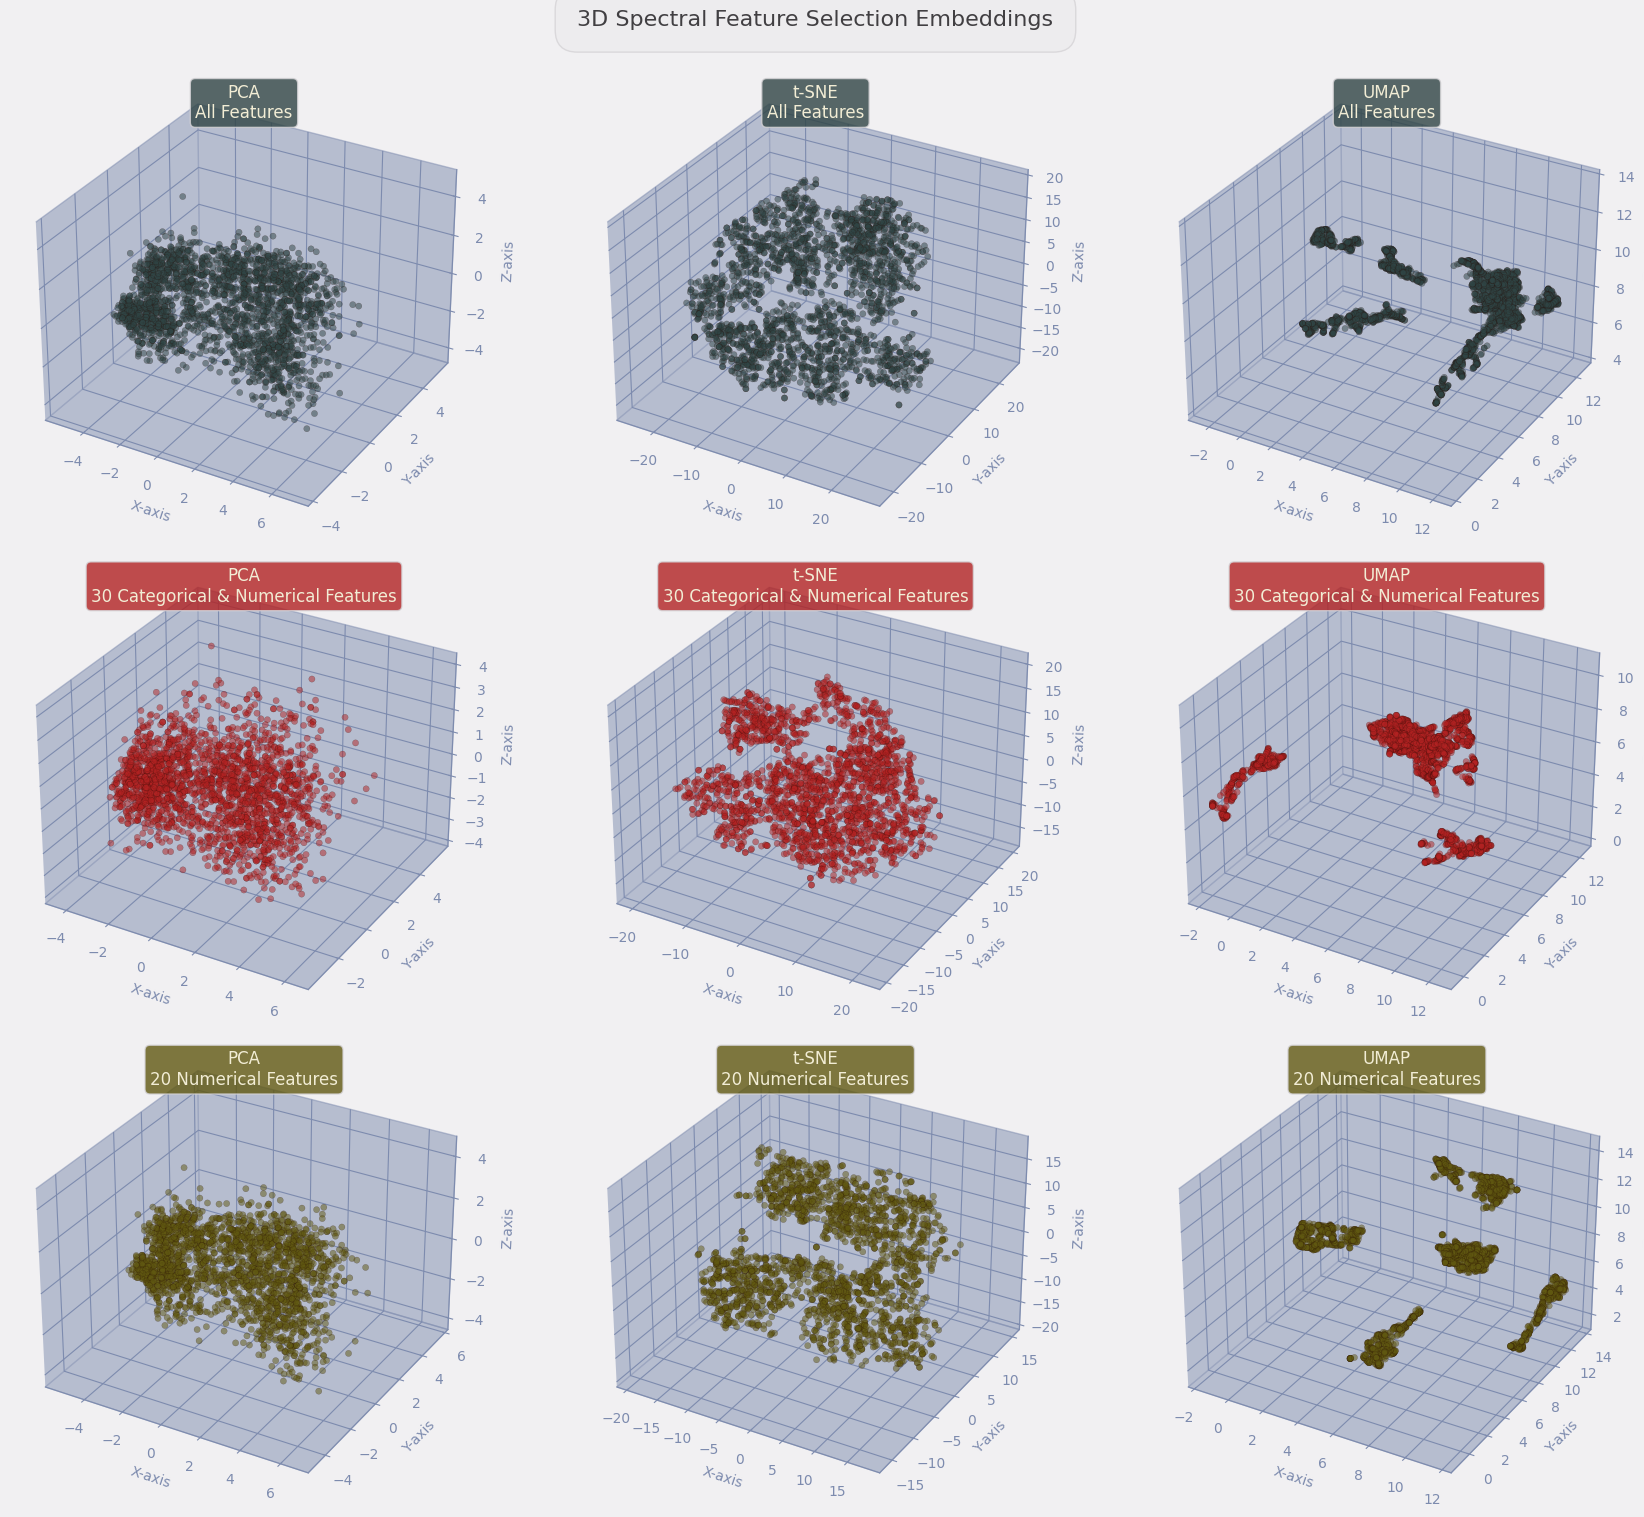

In [133]:
def visualize_embeddings_3d_single_frame(feature_sets, colors, df):
    n_sets = len(feature_sets)
    fig = plt.figure(figsize=(18, 5 * n_sets), facecolor='#F1F0F2')
    gs = gridspec.GridSpec(n_sets, 3, figure=fig)
    
    for i, (name, features) in enumerate(feature_sets.items()):
        color = colors[i]
        
        # Select features
        X = df[features]
        X_processed = X  # Assuming data is already preprocessed

        # PCA
        pca = PCA(n_components=3)
        X_pca = pca.fit_transform(X_processed)

        # t-SNE
        tsne = TSNE(n_components=3, random_state=42)
        X_tsne = tsne.fit_transform(X_processed)

        # UMAP
        reducer = umap.UMAP(n_neighbors=10, n_components=3, random_state=42)
        X_umap = reducer.fit_transform(X_processed)
        
        for j, (data, title) in enumerate([(X_pca, "PCA"), (X_tsne, "t-SNE"), (X_umap, "UMAP")]):
            ax = fig.add_subplot(gs[i, j], projection='3d')
            ax.scatter(data[:, 0], data[:, 1], data[:, 2], color=color, alpha=0.5, edgecolors='#260B05', linewidth=0.2)
            
            # Adjust title, appearance, and layout similar to your 2D function
            ax.set_title(f"{title}\n{name}", color='#F2EDD5', y=0.95, fontfamily='sans-serif', fontweight='light',
                        bbox=dict(facecolor=color, edgecolor='#d5d3d6', boxstyle='round,pad=0.3', alpha=0.8))
            ax.set_facecolor('#F1F0F2')
            ax.xaxis.pane.fill = True
            ax.yaxis.pane.fill = True
            ax.zaxis.pane.fill = True
            grid_color = '#7d8bae'
            ax.xaxis._axinfo["grid"]['color'] = grid_color
            ax.yaxis._axinfo["grid"]['color'] = grid_color
            ax.zaxis._axinfo["grid"]['color'] = grid_color
            edge_color = '#7d8bae'
            ax.xaxis.pane.set_edgecolor(edge_color)
            ax.yaxis.pane.set_edgecolor(edge_color)
            ax.zaxis.pane.set_edgecolor(edge_color)
            pane_color = '#7d8bae'
            ax.xaxis.pane.set_facecolor(pane_color)
            ax.yaxis.pane.set_facecolor(pane_color)
            ax.zaxis.pane.set_facecolor(pane_color)
            tick_colors = '#7d8bae'
            ax.tick_params(colors=tick_colors, which='both')
            ax.set_xlabel('X-axis', color=tick_colors)
            ax.set_ylabel('Y-axis', color=tick_colors)
            ax.set_zlabel('Z-axis', color=tick_colors)
            ax.w_xaxis.line.set_color(tick_colors)
            ax.w_yaxis.line.set_color(tick_colors)
            ax.w_zaxis.line.set_color(tick_colors)
            for line in ax.xaxis.get_ticklines() + ax.yaxis.get_ticklines() + ax.zaxis.get_ticklines():
                line.set_visible(False)
                
    fig.suptitle('3D Spectral Feature Selection Embeddings', y=+1.005, color='#413f42', 
                 fontweight='light', family='sans-serif', size=16,
                 bbox=dict(facecolor='#ecebed', edgecolor='#d5d3d6', boxstyle='round,pad=1', alpha=0.8))
    plt.tight_layout()
    plt.show()


colors = ['#2f4444', 'firebrick', '#605811']
feature_sets = {
    'All Features': df_processed.columns,
    '30 Categorical & Numerical Features': selected_columns,
    '20 Numerical Features': selected_numerical_columns,
}
visualize_embeddings_3d_single_frame(feature_sets, colors, df_processed)

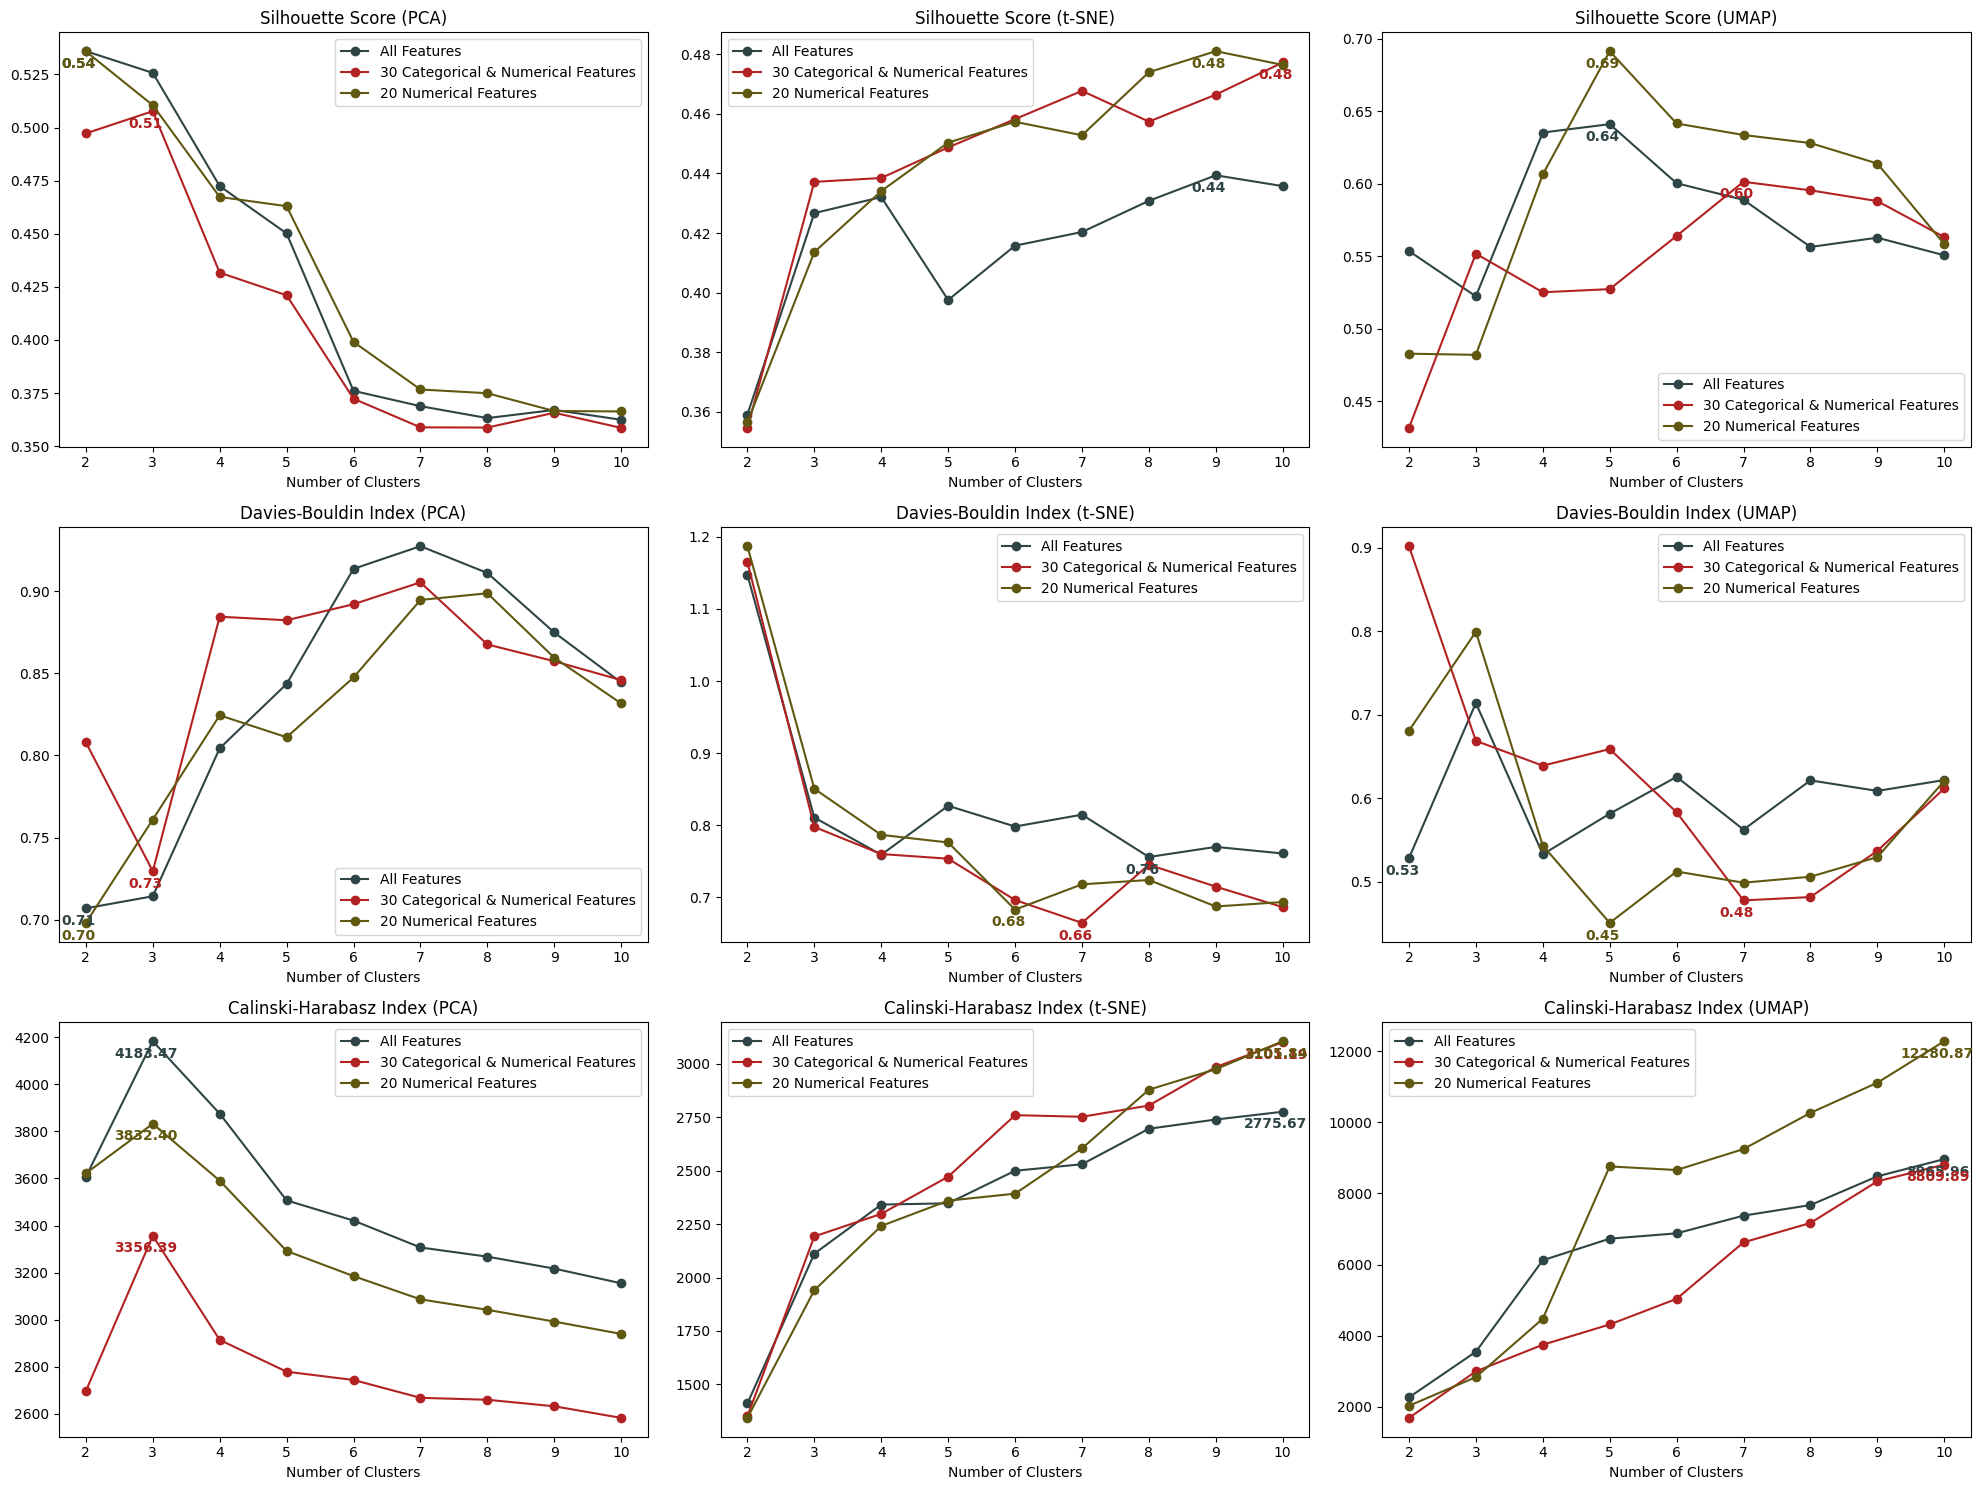

In [146]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

def visualize_embedding_metrics(df, feature_sets, colors):
    # Range of potential clusters
    range_n_clusters = list(range(2, 11))
    
    # Metrics
    metrics = [
        ("Silhouette Score", silhouette_score, np.argmax),
        ("Davies-Bouldin Index", davies_bouldin_score, np.argmin),
        ("Calinski-Harabasz Index", calinski_harabasz_score, np.argmax)
    ]
    
    # Embeddings
    embeddings = [
        ("PCA", PCA(n_components=2)),
        ("t-SNE", TSNE(n_components=2, perplexity=20, random_state=42)),
        ("UMAP", umap.UMAP(n_neighbors=20, n_components=2, random_state=42))
    ]

    # Set up plotting
    fig, axes = plt.subplots(len(metrics), len(embeddings), figsize=(20, 15))

    for e_idx, (e_name, embedder) in enumerate(embeddings):
        for f_idx, (f_name, features) in enumerate(feature_sets.items()):
            X = df[features]
            X_emb = embedder.fit_transform(X)

            for m_idx, (m_name, metric_func, best_idx_func) in enumerate(metrics):
                scores = []

                for n_clusters in range_n_clusters:
                    clusterer = KMeans(n_clusters=n_clusters)
                    cluster_labels = clusterer.fit_predict(X_emb)
                    scores.append(metric_func(X_emb, cluster_labels))

                ax = axes[m_idx, e_idx]
                ax.plot(range_n_clusters, scores, marker='o', linestyle='-', color=colors[f_idx], label=f_name)
                
                best_score_idx = best_idx_func(scores)
                ax.annotate(f'{scores[best_score_idx]:.2f}', 
                            (range_n_clusters[best_score_idx], scores[best_score_idx]),
                            textcoords="offset points", 
                            xytext=(-5,-12), 
                            ha='center',
                            weight='bold',
                            color=colors[f_idx])
                
                ax.set_title(f'{m_name} ({e_name})')
                ax.set_xlabel('Number of Clusters')
                ax.grid(False)
                if f_idx == len(feature_sets) - 1:  # Add legend on the last iteration
                    ax.legend()

    plt.tight_layout()
    plt.show()

# Usage:
colors = ['#2f4444', 'firebrick', '#605811']
feature_sets = {
    'All Features': df_processed.columns,
    '30 Categorical & Numerical Features': selected_columns,
    '20 Numerical Features': selected_numerical_columns
}

visualize_embedding_metrics(df_processed, feature_sets, colors)


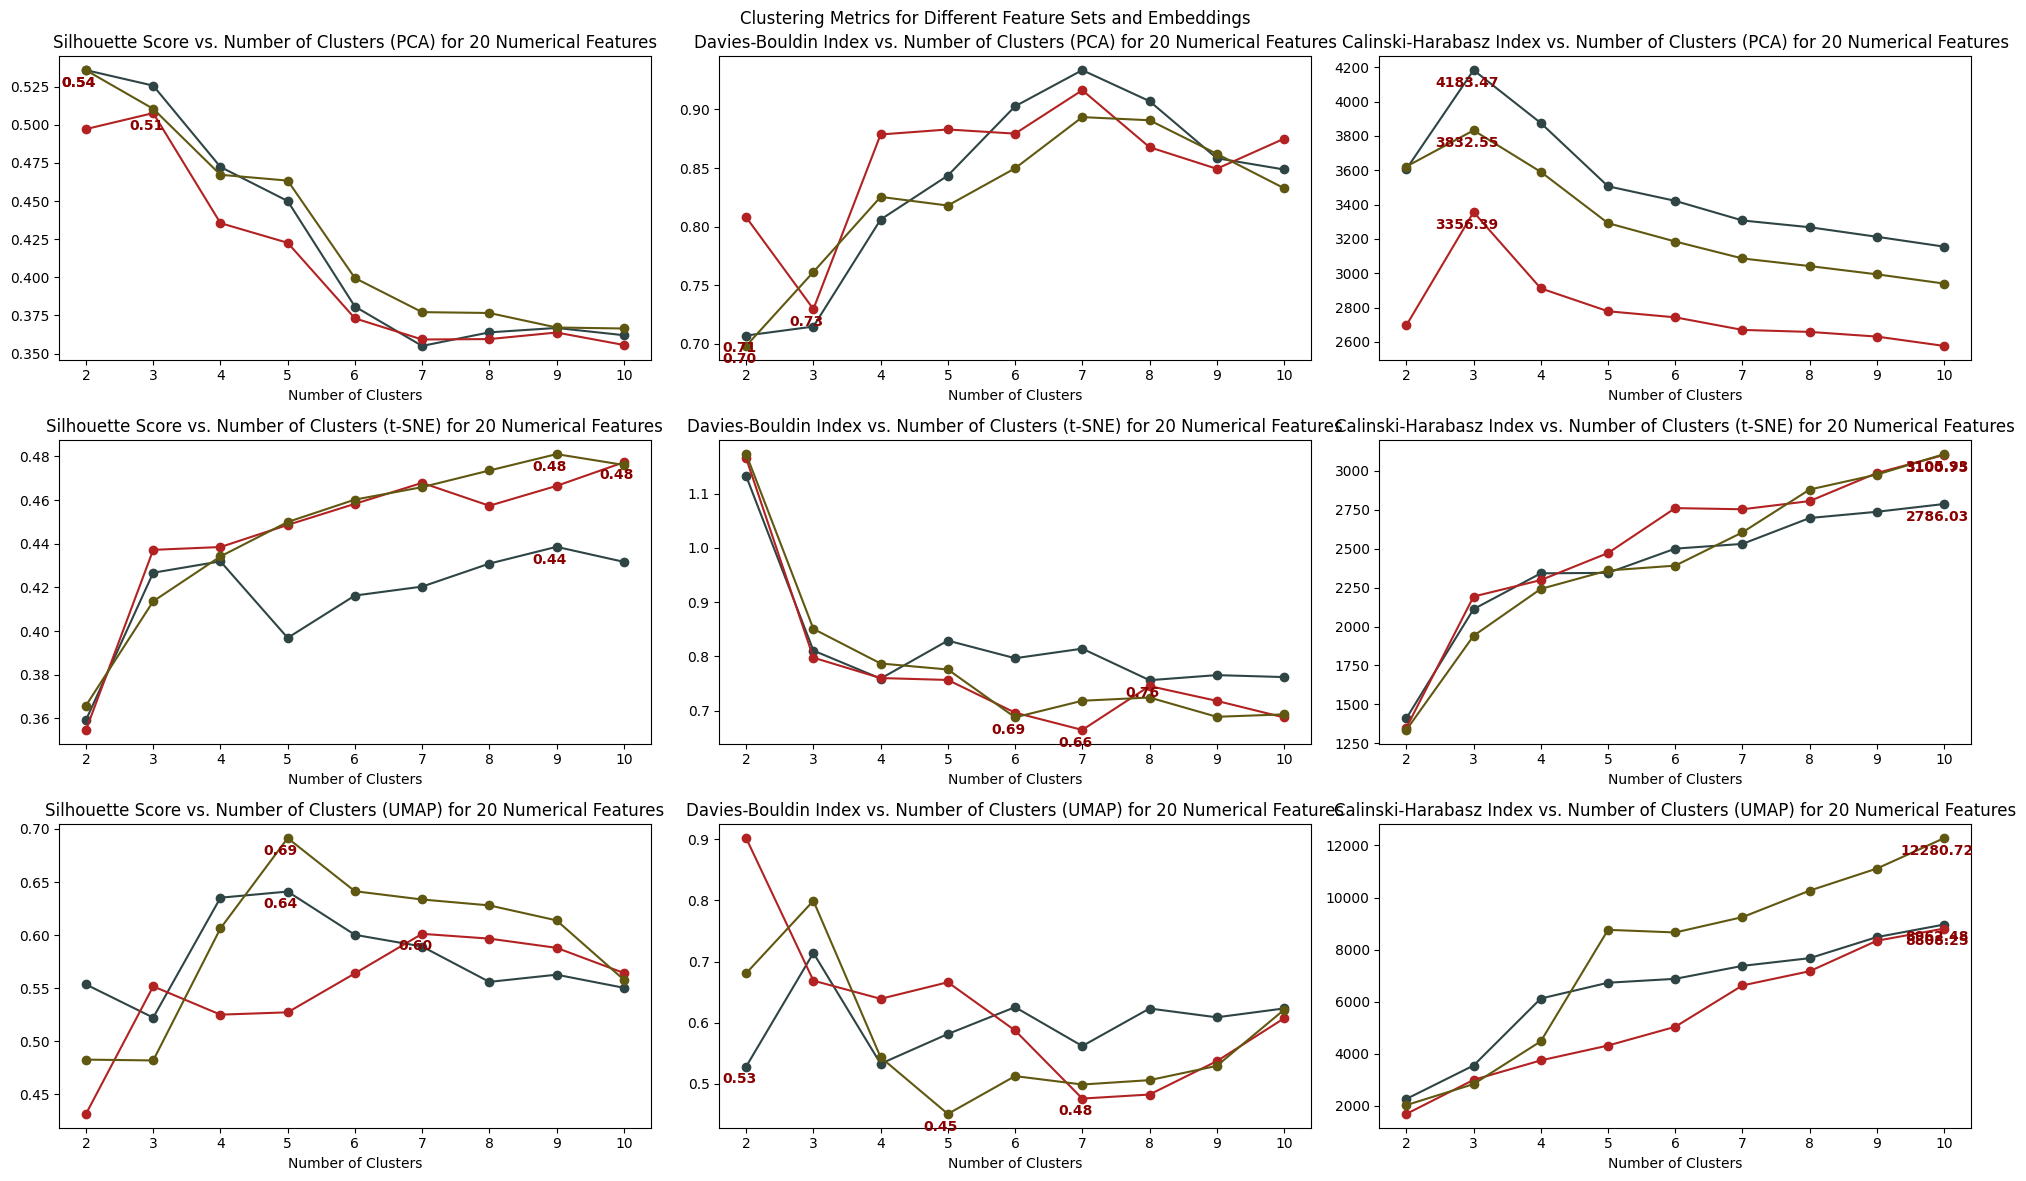

In [145]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

def visualize_embedding_metrics(df, feature_sets, colors):
    # Range of potential clusters
    range_n_clusters = list(range(2, 11))
    
    # Set up plotting
    fig, axes = plt.subplots(3, 3, figsize=(20, 4 * 3))
    
    for f_idx, (f_name, features) in enumerate(feature_sets.items()):
        # Select the data
        X = df[features]

        # PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)

        # t-SNE
        tsne = TSNE(n_components=2, perplexity=20, random_state=42)
        X_tsne = tsne.fit_transform(X)

        # UMAP
        reducer = umap.UMAP(n_neighbors=20, n_components=2, random_state=42)
        X_umap = reducer.fit_transform(X)

        embeddings = [('PCA', X_pca), ('t-SNE', X_tsne), ('UMAP', X_umap)]
        
        for idx, (name, X_emb) in enumerate(embeddings):
            sil_scores, db_scores, ch_scores = [], [], []  # Reset scores for each embedding

            for n_clusters in range_n_clusters:
                clusterer = KMeans(n_clusters=n_clusters)
                cluster_labels = clusterer.fit_predict(X_emb)

                # Compute the scores
                sil_scores.append(silhouette_score(X_emb, cluster_labels))
                db_scores.append(davies_bouldin_score(X_emb, cluster_labels))
                ch_scores.append(calinski_harabasz_score(X_emb, cluster_labels))

            # Plotting scores and annotate for each metric and embedding
            for metric_idx, (scores, label) in enumerate([(sil_scores, 'Silhouette Score'),
                                                          (db_scores, 'Davies-Bouldin Index'),
                                                          (ch_scores, 'Calinski-Harabasz Index')]):
                ax = axes[idx, metric_idx]
                ax.plot(range_n_clusters, scores, marker='o', linestyle='-', color=colors[f_idx])
                ax.set_title(f'{label} vs. Number of Clusters ({name}) for {f_name}')
                ax.set_xlabel('Number of Clusters')

                if label == 'Davies-Bouldin Index':
                    best_score_idx = np.argmin(scores)
                else:
                    best_score_idx = np.argmax(scores)

                ax.annotate(f'{scores[best_score_idx]:.2f}', 
                            (range_n_clusters[best_score_idx], scores[best_score_idx]),
                            textcoords="offset points", 
                            xytext=(-5,-12), 
                            ha='center',
                            weight='bold',
                            color='darkred')
                ax.grid(False)

    fig.suptitle('Clustering Metrics for Different Feature Sets and Embeddings')
    plt.tight_layout()
    plt.show()

# Sample usage:
colors = ['#2f4444', 'firebrick', '#605811']
feature_sets = {
    'All Features': df_processed.columns,
    '30 Categorical & Numerical Features': selected_columns,
    '20 Numerical Features': selected_numerical_columns
}
visualize_embedding_metrics(df_processed, feature_sets, colors)



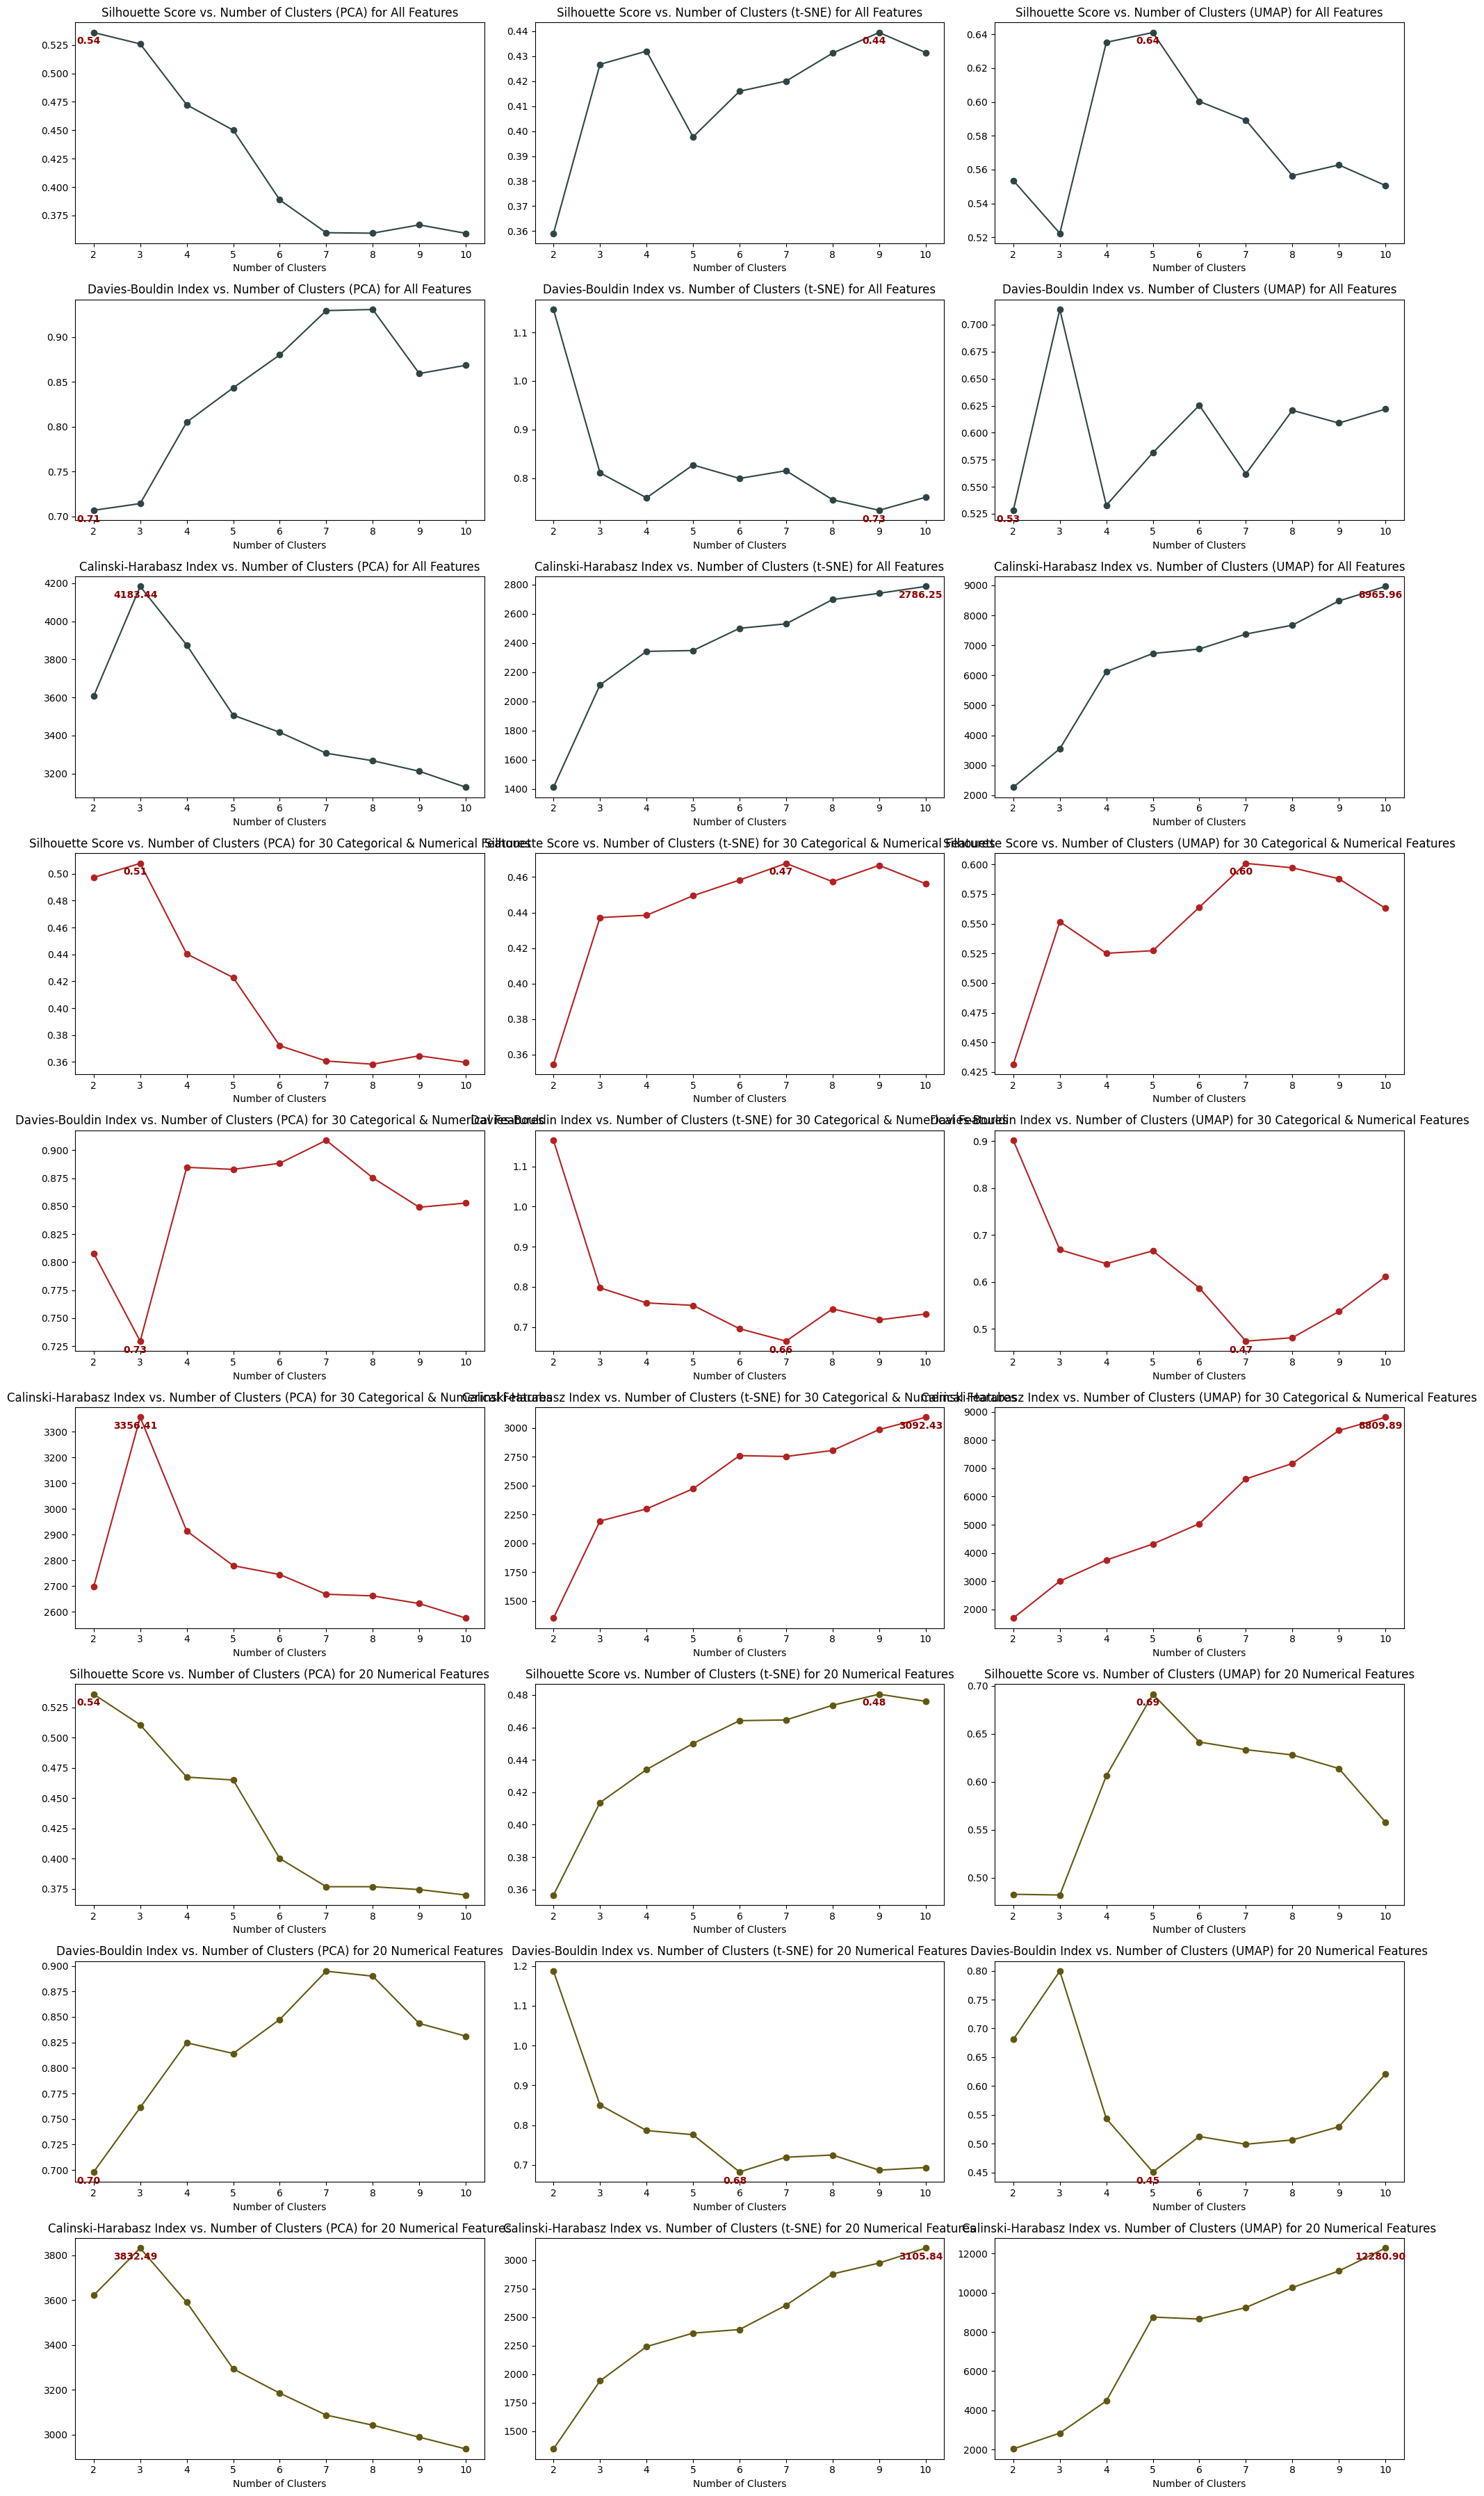

In [143]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

def visualize_embedding_metrics(df, feature_sets, colors):
    # Range of potential clusters
    range_n_clusters = list(range(2, 11))
    
    # Set up plotting
    fig, axes = plt.subplots(len(feature_sets) * 3, 3, figsize=(20, 4 * len(feature_sets) * 3))
    
    for f_idx, (f_name, features) in enumerate(feature_sets.items()):
        # Select the data
        X = df[features]

        # PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)

        # t-SNE
        tsne = TSNE(n_components=2, perplexity=20, random_state=42)
        X_tsne = tsne.fit_transform(X)

        # UMAP
        reducer = umap.UMAP(n_neighbors=20, n_components=2, random_state=42)
        X_umap = reducer.fit_transform(X)

        embeddings = [('PCA', X_pca), ('t-SNE', X_tsne), ('UMAP', X_umap)]
        
        for idx, (name, X_emb) in enumerate(embeddings):
            sil_scores, db_scores, ch_scores = [], [], []  # Reset scores for each embedding

            for n_clusters in range_n_clusters:
                clusterer = KMeans(n_clusters=n_clusters)
                cluster_labels = clusterer.fit_predict(X_emb)

                # Compute the scores
                sil_scores.append(silhouette_score(X_emb, cluster_labels))
                db_scores.append(davies_bouldin_score(X_emb, cluster_labels))
                ch_scores.append(calinski_harabasz_score(X_emb, cluster_labels))

            # Plotting scores and annotate for each metric and embedding
            for metric_idx, (scores, label) in enumerate([(sil_scores, 'Silhouette Score'),
                                                          (db_scores, 'Davies-Bouldin Index'),
                                                          (ch_scores, 'Calinski-Harabasz Index')]):
                ax = axes[f_idx * 3 + metric_idx, idx]
                ax.plot(range_n_clusters, scores, marker='o', linestyle='-', color=colors[f_idx])
                ax.set_title(f'{label} vs. Number of Clusters ({name}) for {f_name}')
                ax.set_xlabel('Number of Clusters')

                if label == 'Davies-Bouldin Index':
                    best_score_idx = np.argmin(scores)
                else:
                    best_score_idx = np.argmax(scores)

                ax.annotate(f'{scores[best_score_idx]:.2f}', 
                            (range_n_clusters[best_score_idx], scores[best_score_idx]),
                            textcoords="offset points", 
                            xytext=(-5,-12), 
                            ha='center',
                            weight='bold',
                            color='darkred')
                ax.grid(False)

    plt.tight_layout()
    plt.show()

# Sample usage:
colors = ['#2f4444', 'firebrick', '#605811']
feature_sets = {
    'All Features': df_processed.columns,
    '30 Categorical & Numerical Features': selected_columns,
    '20 Numerical Features': selected_numerical_columns
}
visualize_embedding_metrics(df_processed, feature_sets, colors)


IndexError: index 3 is out of bounds for axis 0 with size 3

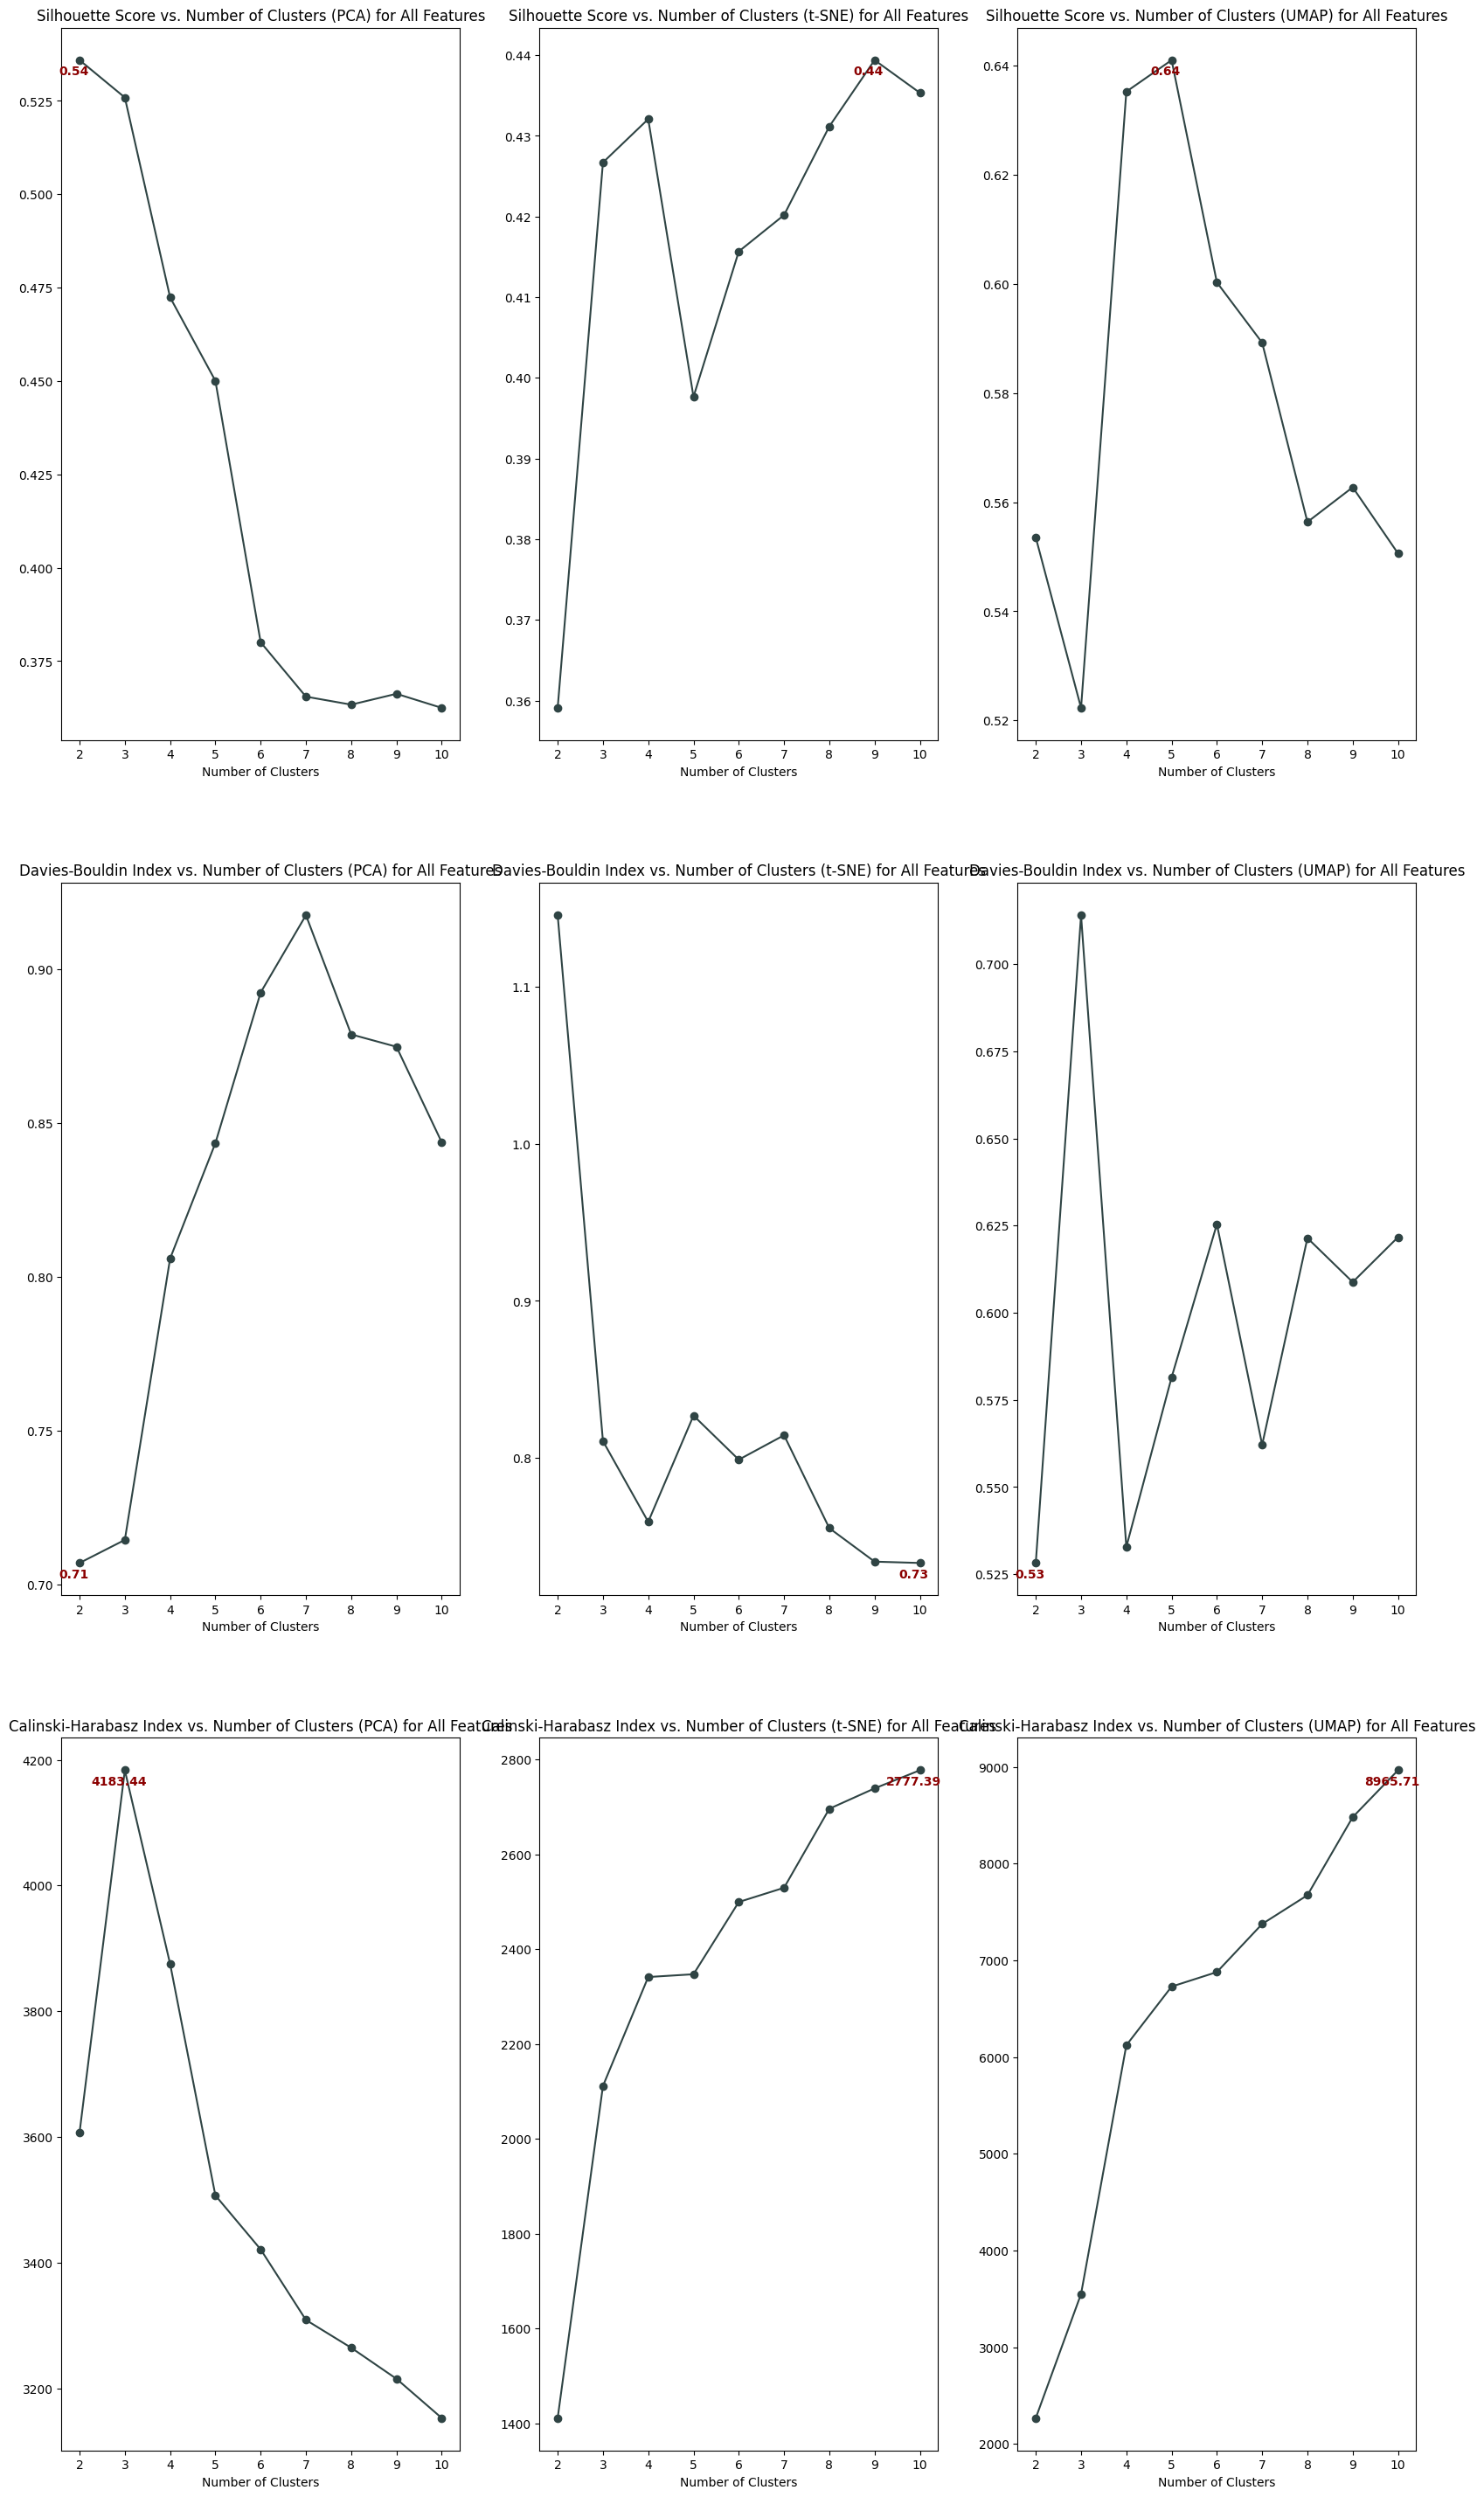

In [139]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

def visualize_embedding_metrics(df, feature_sets, colors):
    # Range of potential clusters
    range_n_clusters = list(range(2, 11))
    
    # Set up plotting
    fig, axes = plt.subplots(len(feature_sets), 3, figsize=(20, 12 * len(feature_sets)))
    
    for f_idx, (f_name, features) in enumerate(feature_sets.items()):
        # Select the data
        X = df[features]

        # PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)

        # t-SNE
        tsne = TSNE(n_components=2, perplexity=20, random_state=42)
        X_tsne = tsne.fit_transform(X)

        # UMAP
        reducer = umap.UMAP(n_neighbors=20, n_components=2, random_state=42)
        X_umap = reducer.fit_transform(X)

        embeddings = [('PCA', X_pca), ('t-SNE', X_tsne), ('UMAP', X_umap)]
        
        for idx, (name, X_emb) in enumerate(embeddings):
            sil_scores, db_scores, ch_scores = [], [], []  # Reset scores for each embedding

            for n_clusters in range_n_clusters:
                clusterer = KMeans(n_clusters=n_clusters)
                cluster_labels = clusterer.fit_predict(X_emb)

                # Compute the scores
                sil_scores.append(silhouette_score(X_emb, cluster_labels))
                db_scores.append(davies_bouldin_score(X_emb, cluster_labels))
                ch_scores.append(calinski_harabasz_score(X_emb, cluster_labels))

            # Plotting scores and annotate for each metric and embedding
            for metric_idx, (scores, label) in enumerate([(sil_scores, 'Silhouette Score'),
                                                          (db_scores, 'Davies-Bouldin Index'),
                                                          (ch_scores, 'Calinski-Harabasz Index')]):
                ax = axes[f_idx * 3 + metric_idx, idx]
                ax.plot(range_n_clusters, scores, marker='o', linestyle='-', color=colors[f_idx])
                ax.set_title(f'{label} ({name}) for {f_name}')
                ax.set_xlabel('Number of Clusters')

                if label == 'Davies-Bouldin Index':
                    best_score_idx = np.argmin(scores)
                else:
                    best_score_idx = np.argmax(scores)

                ax.annotate(f'{scores[best_score_idx]:.2f}', 
                            (range_n_clusters[best_score_idx], scores[best_score_idx]),
                            textcoords="offset points", 
                            xytext=(-5,-12), 
                            ha='center',
                            weight='bold',
                            color='darkred')
                ax.grid(False)

    plt.tight_layout()
    plt.show()

# Sample usage:
colors = ['#2f4444', 'firebrick', '#605811']
feature_sets = {
    'All Features': df_processed.columns,
    '30 Categorical & Numerical Features': selected_columns,
    '20 Numerical Features': selected_numerical_columns
}
visualize_embedding_metrics(df_processed, feature_sets, colors)
